<a href="https://colab.research.google.com/github/rodela17/ORES-5160-02/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HDS5210-02 Final Project:

Mortality rate per total cases is an important health care outcome, many studies have been conducted around mortality rate. I too choose this final project to see how does mortality rate vary with other factors such as procedures/conditions, staffed beds, cases.

Objective:
•	To Explore how the number of cases and deaths correlate, providing insights into the severity of medical conditions.
•	To Understand how the number of staffed beds relates to the number of cases and total discharges, providing insights into resource allocation.
•To	Use the correlation map to uncover potential areas for further investigation or to highlight variables strongly influencing each other






1. ***DATA access and formats***:

The following data is retrieved from two datasets in csv and html format.

The first dataset "2016-2021 California Hospital Inpatient Mortality Rates and Quality Ratings"in csv format, dataset is uploaded from the local file from my computer Which I downloaded from this link: https://data.chhs.ca.gov/dataset/05fee607-cea9-4bf1-8b53-20ca584748a3/resource/af88090e-b6f5-4f65-a7ea-d613e6569d96/download/2016-2021-imi-results-long-view.csv

The second dataset "INDIVIDUAL HOSPITAL STATISTICS FOR CALIFORNIA"I have directly accessed from the website American hospital Directory through this url in html format: https://www.ahd.com/states/hospital_CA.html


1. 2016-2021 California Hospital Inpatient Mortality Rates and Quality Ratings data:
The dataset contains risk-adjusted mortality rates, quality ratings, and number of deaths and cases for 6 medical conditions treated (Acute Stroke, Acute Myocardial Infarction, Heart Failure, Gastrointestinal Hemorrhage, Hip Fracture and Pneumonia) and 5 procedures performed (Abdominal Aortic Aneurysm Repair – open and unruptured, Abdominal Aortic Aneurysm Repair – endovascular and unruptured, Carotid Endarterectomy, Pancreatic Resection, and Percutaneous Coronary Intervention) in California hospitals. The 2021 IMIs were generated using AHRQ Version 2022, while previous years' IMIs were generated with older versions of AHRQ software (2020 IMIs by Version 2021, 2019 IMIs by Version 2020, 2016-2018 IMIs by Version 2019, 2014 and 2015 IMIs by Version 5.0, and 2012 and 2013 IMIs by Version 4.5). The differences in the statistical method employed and inclusion and exclusion criteria using different versions can lead to different results. Users should not compare trends of mortality rates over time. However, many hospitals showed consistent performance over years; “better” performing hospitals may perform better and “worse” performing hospitals may perform worse consistently across years. This dataset does not include conditions treated or procedures performed in outpatient settings.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [13]:
# Reading California dataset from my computer
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cali_hospitals.csv to cali_hospitals.csv
User uploaded file "cali_hospitals.csv" with length 6231529 bytes


In [14]:
cali_data=pd.read_csv("cali_hospitals.csv")

In [16]:
cali_data

_id  YEAR COUNTY                 Hospital Name    OSHPDID  \
0          1  2016   AAAA                     STATEWIDE       None   
1          2  2016   AAAA                     STATEWIDE       None   
2          3  2016   AAAA                     STATEWIDE       None   
3          4  2016   AAAA                     STATEWIDE       None   
4          5  2016   AAAA                     STATEWIDE       None   
...      ...   ...    ...                           ...        ...   
53211  53212  2021   Yuba  Adventist Health and Rideout  106580996   
53212  53213  2021   Yuba  Adventist Health and Rideout  106580996   
53213  53214  2021   Yuba  Adventist Health and Rideout  106580996   
53214  53215  2021   Yuba  Adventist Health and Rideout  106580996   
53215  53216  2021   Yuba  Adventist Health and Rideout  106580996   

            Procedure/Condition Mortality Rate  Deaths  Cases  \
0         AAA Repair Unruptured            1.3      30   2358   
1                           AMI            6.1    3178  52167   
2                  Acute Stroke            9.1    5482  60184   
3      Acute Stroke Hemorrhagic           21.1    2580  12210   
4         Acute Stroke Ischemic              5    2258  45141   
...                         ...            ...     ...    ...   
53211             Heart Failure            2.2      15    799   
53212              Hip Fracture            3.6       4    138   
53213                       PCI            5.2       9    194   
53214      Pancreatic Resection            NaN     NaN    NaN   
53215                 Pneumonia           10.4      28    440   

      Hospital Ratings    LONGITUDE   LATITUDE  
0                 None         None       None  
1                 None         None       None  
2                 None         None       None  
3                 None         None       None  
4                 None         None       None  
...                ...          ...        ...  
53211      As Expected  -121.593602  39.138805  
53212      As Expected  -121.593602  39.138805  
53213      As Expected  -121.593602  39.138805  
53214              NaN  -121.593602  39.138805  
53215      As Expected  -121.593602  39.138805  

[53216 rows x 12 columns]

In this step, I have removed unwanted columns by following the below code:

In [43]:
# Specify the columns to be removed
columns_to_remove = ['_id', 'OSHPDID']

# Remove the specified columns from the DataFrame
cali_data = cali_data.drop(columns=columns_to_remove)


After succesfully removing the unwanted columns from the dataset, I have checked cali_data

In [44]:
# After removing unwanted columns the data frame
cali_data

YEAR COUNTY                 Hospital Name       Procedure/Condition  \
0      2016   AAAA                     STATEWIDE     AAA Repair Unruptured   
1      2016   AAAA                     STATEWIDE                       AMI   
2      2016   AAAA                     STATEWIDE              Acute Stroke   
3      2016   AAAA                     STATEWIDE  Acute Stroke Hemorrhagic   
4      2016   AAAA                     STATEWIDE     Acute Stroke Ischemic   
...     ...    ...                           ...                       ...   
53211  2021   Yuba  Adventist Health and Rideout             Heart Failure   
53212  2021   Yuba  Adventist Health and Rideout              Hip Fracture   
53213  2021   Yuba  Adventist Health and Rideout                       PCI   
53214  2021   Yuba  Adventist Health and Rideout      Pancreatic Resection   
53215  2021   Yuba  Adventist Health and Rideout                 Pneumonia   

      Mortality Rate  Deaths  Cases Hospital Ratings    LONGITUDE   LATITUDE  
0                1.3      30   2358             None         None       None  
1                6.1    3178  52167             None         None       None  
2                9.1    5482  60184             None         None       None  
3               21.1    2580  12210             None         None       None  
4                  5    2258  45141             None         None       None  
...              ...     ...    ...              ...          ...        ...  
53211            2.2      15    799      As Expected  -121.593602  39.138805  
53212            3.6       4    138      As Expected  -121.593602  39.138805  
53213            5.2       9    194      As Expected  -121.593602  39.138805  
53214            NaN     NaN    NaN              NaN  -121.593602  39.138805  
53215           10.4      28    440      As Expected  -121.593602  39.138805  

[53216 rows x 10 columns]

In this step, I have Created a separate DataFrame containing only the selected  conditions and formed a cleaned cali data

In [51]:
#the conditions I want to include in the separate table
selected_conditions = ['AMI', 'Heart Failure', 'PCI']

# Create a separate DataFrame containing only the selected conditions
cali_data_cleaned = cali_data.loc[cali_data['Procedure/Condition'].isin(selected_conditions)].copy()

In [52]:
cali_data_cleaned

YEAR   COUNTY                 Hospital Name Procedure/Condition  \
1      2016     AAAA                     STATEWIDE                 AMI   
9      2016     AAAA                     STATEWIDE       Heart Failure   
11     2016     AAAA                     STATEWIDE                 PCI   
17     2016  Alameda              Alameda Hospital                 AMI   
25     2016  Alameda              Alameda Hospital       Heart Failure   
...     ...      ...                           ...                 ...   
53197  2021     Yolo         Sutter Davis Hospital       Heart Failure   
53199  2021     Yolo         Sutter Davis Hospital                 PCI   
53204  2021     Yuba  Adventist Health and Rideout                 AMI   
53211  2021     Yuba  Adventist Health and Rideout       Heart Failure   
53213  2021     Yuba  Adventist Health and Rideout                 PCI   

      Mortality Rate  Deaths  Cases Hospital Ratings    LONGITUDE   LATITUDE  
1                6.1    3178  52167             None         None       None  
9                2.9    2763  95205             None         None       None  
11               3.6    1315  36912             None         None       None  
17              16.1       3     17      As Expected  -122.253991   37.76266  
25               2.1       2    111      As Expected  -122.253991   37.76266  
...              ...     ...    ...              ...          ...        ...  
53197            0.7       1    151      As Expected   -121.77164   38.56289  
53199            NaN     NaN    NaN              NaN   -121.77164   38.56289  
53204            8.3      16    211      As Expected  -121.593602  39.138805  
53211            2.2      15    799      As Expected  -121.593602  39.138805  
53213            5.2       9    194      As Expected  -121.593602  39.138805  

[10578 rows x 10 columns]

I have removed the duplicates from the data by using cali_data_cleaned.drop_duplicates code

In [53]:
cali_data_cleaned.drop_duplicates()

YEAR   COUNTY                 Hospital Name Procedure/Condition  \
1      2016     AAAA                     STATEWIDE                 AMI   
9      2016     AAAA                     STATEWIDE       Heart Failure   
11     2016     AAAA                     STATEWIDE                 PCI   
17     2016  Alameda              Alameda Hospital                 AMI   
25     2016  Alameda              Alameda Hospital       Heart Failure   
...     ...      ...                           ...                 ...   
53197  2021     Yolo         Sutter Davis Hospital       Heart Failure   
53199  2021     Yolo         Sutter Davis Hospital                 PCI   
53204  2021     Yuba  Adventist Health and Rideout                 AMI   
53211  2021     Yuba  Adventist Health and Rideout       Heart Failure   
53213  2021     Yuba  Adventist Health and Rideout                 PCI   

      Mortality Rate  Deaths  Cases Hospital Ratings    LONGITUDE   LATITUDE  
1                6.1    3178  52167             None         None       None  
9                2.9    2763  95205             None         None       None  
11               3.6    1315  36912             None         None       None  
17              16.1       3     17      As Expected  -122.253991   37.76266  
25               2.1       2    111      As Expected  -122.253991   37.76266  
...              ...     ...    ...              ...          ...        ...  
53197            0.7       1    151      As Expected   -121.77164   38.56289  
53199            NaN     NaN    NaN              NaN   -121.77164   38.56289  
53204            8.3      16    211      As Expected  -121.593602  39.138805  
53211            2.2      15    799      As Expected  -121.593602  39.138805  
53213            5.2       9    194      As Expected  -121.593602  39.138805  

[5769 rows x 10 columns]

As i have explained, I have retrieved the second dataset in html format from American Hospital Directory through the URL. This dataset consists data of Hospital Name and their satffed beds, total discharges, patient days and Gross patient revenue.

In [54]:
#Reading the California hospital data file from the website
hospital_data_url = "https://www.ahd.com/states/hospital_CA.html"

# Read the data from the URL
hospital_data = pd.read_html(hospital_data_url)[0]

In [55]:
hospital_data

Hospital Name            City  \
0                         Adventist Health Simi Valley     Simi Valley   
1                                Downey Medical Center          Downey   
2                           MarinHealth Medical Center       Greenbrae   
3                Providence Saint John's Health Center    Santa Monica   
4                        Woodland Hills Medical Center  Woodland Hills   
..                                                 ...             ...   
331                   Whittier Hospital Medical Center        Whittier   
332                       Wilma Chan Highland Hospital         Oakland   
333                         Woodland Memorial Hospital        Woodland   
334  Zuckerberg San Francisco General Hospital and ...   San Francisco   
335                                              TOTAL             NaN   

     Staffed Beds  Total Discharges  Patient Days Gross Patient Revenue ($000)  
0             144              7116         32523                   $1,081,403  
1             424             16792         80166                   $2,973,068  
2             327              9068         46805                   $3,110,752  
3             228             12119         53650                   $1,558,038  
4             274              9273         39598                   $1,531,615  
..            ...               ...           ...                          ...  
331           178              5334         23210                     $661,126  
332           434             12000         63542                   $2,755,462  
333           105              2989         11197                     $906,468  
334           397             13738         81542                   $3,656,345  
335         74411           2973634      15165283                 $616,308,498  

[336 rows x 6 columns]

2. ***Data Merging:***

MERGING datasets by using common column hospital name and formed a merged_data

In [56]:
# Merging two datasets by using hospital name
merged_data_cleaned = pd.merge(cali_data_cleaned,hospital_data, on='Hospital Name')
merged_data_cleaned

YEAR   COUNTY                  Hospital Name Procedure/Condition  \
0     2016  Alameda               Alameda Hospital                 AMI   
1     2016  Alameda               Alameda Hospital       Heart Failure   
2     2016  Alameda               Alameda Hospital                 PCI   
3     2017  Alameda               Alameda Hospital                 AMI   
4     2017  Alameda               Alameda Hospital       Heart Failure   
...    ...      ...                            ...                 ...   
4528  2021   Tulare   Kaweah Health Medical Center       Heart Failure   
4529  2021   Tulare   Kaweah Health Medical Center                 PCI   
4530  2021  Ventura  St. John's Hospital Camarillo                 AMI   
4531  2021  Ventura  St. John's Hospital Camarillo       Heart Failure   
4532  2021  Ventura  St. John's Hospital Camarillo                 PCI   

     Mortality Rate  Deaths Cases Hospital Ratings    LONGITUDE  LATITUDE  \
0              16.1       3    17      As Expected  -122.253991  37.76266   
1               2.1       2   111      As Expected  -122.253991  37.76266   
2                 .       .     .              NaN  -122.253991  37.76266   
3                 0       0    10      As Expected  -122.253991  37.76266   
4               3.4       5   137      As Expected  -122.253991  37.76266   
...             ...     ...   ...              ...          ...       ...   
4528            5.2      44  1045            Worse   -119.29345  36.32753   
4529            7.2      25   366            Worse   -119.29345  36.32753   
4530            4.9       1    23      As Expected     -119.018  34.24177   
4531            2.3       4   152      As Expected     -119.018  34.24177   
4532            NaN     NaN   NaN              NaN     -119.018  34.24177   

           City  Staffed Beds  Total Discharges  Patient Days  \
0       Alameda           247              2467         11865   
1       Alameda           247              2467         11865   
2       Alameda           247              2467         11865   
3       Alameda           247              2467         11865   
4       Alameda           247              2467         11865   
...         ...           ...               ...           ...   
4528    Visalia           608             21588        126508   
4529    Visalia           608             21588        126508   
4530  Camarillo           132              3733         14929   
4531  Camarillo           132              3733         14929   
4532  Camarillo           132              3733         14929   

     Gross Patient Revenue ($000)  
0                        $601,334  
1                        $601,334  
2                        $601,334  
3                        $601,334  
4                        $601,334  
...                           ...  
4528                   $2,552,797  
4529                   $2,552,797  
4530                     $586,625  
4531                     $586,625  
4532                     $586,625  

[4533 rows x 15 columns]

In [124]:
mergedData_innerJoin = pd.merge(cali_data,hospital_data, on='Hospital Name', how='inner' )
mergedData_innerJoin

YEAR   COUNTY                  Hospital Name       Procedure/Condition  \
0      2016  Alameda               Alameda Hospital     AAA Repair Unruptured   
1      2016  Alameda               Alameda Hospital                       AMI   
2      2016  Alameda               Alameda Hospital              Acute Stroke   
3      2016  Alameda               Alameda Hospital  Acute Stroke Hemorrhagic   
4      2016  Alameda               Alameda Hospital     Acute Stroke Ischemic   
...     ...      ...                            ...                       ...   
22717  2021  Ventura  St. John's Hospital Camarillo             Heart Failure   
22718  2021  Ventura  St. John's Hospital Camarillo              Hip Fracture   
22719  2021  Ventura  St. John's Hospital Camarillo                       PCI   
22720  2021  Ventura  St. John's Hospital Camarillo      Pancreatic Resection   
22721  2021  Ventura  St. John's Hospital Camarillo                 Pneumonia   

      Mortality Rate  Deaths Cases Hospital Ratings    LONGITUDE  LATITUDE  \
0                  .       .     .              NaN  -122.253991  37.76266   
1               16.1       3    17      As Expected  -122.253991  37.76266   
2               23.6       9    74            Worse  -122.253991  37.76266   
3               48.9       5     9            Worse  -122.253991  37.76266   
4               15.2       4    65      As Expected  -122.253991  37.76266   
...              ...     ...   ...              ...          ...       ...   
22717            2.3       4   152      As Expected     -119.018  34.24177   
22718            5.3       4    92      As Expected     -119.018  34.24177   
22719            NaN     NaN   NaN              NaN     -119.018  34.24177   
22720            NaN     NaN   NaN              NaN     -119.018  34.24177   
22721            8.3      14   180      As Expected     -119.018  34.24177   

            City  Staffed Beds  Total Discharges  Patient Days  \
0        Alameda           247              2467         11865   
1        Alameda           247              2467         11865   
2        Alameda           247              2467         11865   
3        Alameda           247              2467         11865   
4        Alameda           247              2467         11865   
...          ...           ...               ...           ...   
22717  Camarillo           132              3733         14929   
22718  Camarillo           132              3733         14929   
22719  Camarillo           132              3733         14929   
22720  Camarillo           132              3733         14929   
22721  Camarillo           132              3733         14929   

      Gross Patient Revenue ($000)  
0                         $601,334  
1                         $601,334  
2                         $601,334  
3                         $601,334  
4                         $601,334  
...                            ...  
22717                     $586,625  
22718                     $586,625  
22719                     $586,625  
22720                     $586,625  
22721                     $586,625  

[22722 rows x 15 columns]

3. ***Data Aggregation and Pivoting:***
As a process of DATA aggregation and Pivoting, I have followed the further steps here:

In [125]:
merged_data_cleaned.describe()

YEAR  Mortality Rate       Deaths        Cases  \
count  3549.000000     3549.000000  3549.000000  3549.000000   
mean   2018.376726        4.216681     8.547196   237.415892   
std       1.603206        4.217421     9.369157   233.834331   
min    2016.000000        0.000000     0.000000     3.000000   
25%    2017.000000        1.900000     2.000000    59.000000   
50%    2018.000000        3.400000     5.000000   173.000000   
75%    2020.000000        5.400000    13.000000   340.000000   
max    2021.000000       74.100000    78.000000  1890.000000   

       Hospital Ratings  Staffed Beds  Total Discharges   Patient Days  \
count       3549.000000   3549.000000       3549.000000    3549.000000   
mean           0.149901    241.999436       9390.411102   47512.335869   
std            0.465934    167.374559       7765.625349   43702.020415   
min            0.000000      0.000000          0.000000       0.000000   
25%            0.000000    119.000000       3372.000000   15623.000000   
50%            0.000000    206.000000       7116.000000   35267.000000   
75%            0.000000    347.000000      13197.000000   66971.000000   
max            2.000000    934.000000      50743.000000  295623.000000   

       Gross Patient Revenue ($000)  Total Discharges Log  Procedure_AMI  \
count                        3549.0           3549.000000    3549.000000   
mean                            0.0              8.750442       0.395604   
std                             0.0              1.120250       0.489049   
min                             0.0              0.000000       0.000000   
25%                             0.0              8.123558       0.000000   
50%                             0.0              8.870242       0.000000   
75%                             0.0              9.487821       1.000000   
max                             0.0             10.834549       1.000000   

       Procedure_Heart Failure  Procedure_PCI  
count              3549.000000    3549.000000  
mean                  0.420118       0.184277  
std                   0.493647       0.387765  
min                   0.000000       0.000000  
25%                   0.000000       0.000000  
50%                   0.000000       0.000000  
75%                   1.000000       0.000000  
max                   1.000000       1.000000

In [80]:
# To look for the unique values
merged_data_cleaned.nunique().sort_values()

Gross Patient Revenue ($000)      1
Procedure/Condition               3
Hospital Ratings                  3
YEAR                              6
COUNTY                           41
 Deaths                          54
Staffed Beds                    132
City                            140
Hospital Name                   166
Total Discharges                166
Patient Days                    166
LONGITUDE                       167
LATITUDE                        167
Mortality Rate                  169
Cases                           649
dtype: int64

In [81]:
# To look for the null values
merged_data_cleaned.isnull().sum()

YEAR                              0
COUNTY                            0
Hospital Name                     0
Procedure/Condition               0
Mortality Rate                  984
 Deaths                         984
Cases                           984
Hospital Ratings                984
LONGITUDE                         0
LATITUDE                          0
City                              0
Staffed Beds                      0
Total Discharges                  0
Patient Days                      0
Gross Patient Revenue ($000)      0
dtype: int64

In [82]:
# Drop rows with null values
merged_data_cleaned = merged_data_cleaned.dropna()

# Display the updated DataFrame info
print(merged_data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3549 entries, 0 to 4531
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   YEAR                          3549 non-null   int64  
 1   COUNTY                        3549 non-null   object 
 2   Hospital Name                 3549 non-null   object 
 3   Procedure/Condition           3549 non-null   object 
 4   Mortality Rate                3549 non-null   float64
 5    Deaths                       3549 non-null   float64
 6   Cases                         3549 non-null   float64
 7   Hospital Ratings              3549 non-null   object 
 8   LONGITUDE                     3549 non-null   object 
 9   LATITUDE                      3549 non-null   object 
 10  City                          3549 non-null   object 
 11  Staffed Beds                  3549 non-null   int64  
 12  Total Discharges              3549 non-null   int64  
 13  Pat

In [84]:
#Aggregating data set by grouping them by hospital name
aggregated_data = mergedData_innerJoin.groupby('Hospital Name').size()
aggregated_data

Hospital Name
AHMC Seton Medical Center            14
Adventist Health Bakersfield        134
Adventist Health Delano              42
Adventist Health Glendale           134
Adventist Health Hanford            134
                                   ... 
Watsonville Community Hospital      166
West Anaheim Medical Center         166
West Covina Medical Center          166
Whittier Hospital Medical Center    166
Woodland Memorial Hospital          166
Length: 166, dtype: int64

4. ***Data Transformation:***
I have performed few types of field level data transformations.

In [102]:
import numpy as np
# Numeric Transformation - Log Transformation:Applying a log transformation to 'Total Discharges' column.
merged_data_cleaned['Total Discharges Log'] = np.log1p(merged_data_cleaned['Total Discharges']).copy()

<ipython-input-102-aa7bc637b25e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['Total Discharges Log'] = np.log1p(merged_data_cleaned['Total Discharges']).copy()


In [103]:
#String Transformation - Capitalization:  Converting the 'City' column to uppercase.
merged_data_cleaned['City Uppercase'] = merged_data_cleaned['City'].str.upper()

<ipython-input-103-e67869677752>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['City Uppercase'] = merged_data_cleaned['City'].str.upper()


In [104]:
# Boolean Transformation - Creating Binary Indicator: Creating a binary indicator for 'High Mortality' based on a threshold.
threshold = 10  # Set your threshold value
merged_data_cleaned['High Mortality'] = merged_data_cleaned['Mortality Rate'] > threshold

<ipython-input-104-a8d41fbd581d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['High Mortality'] = merged_data_cleaned['Mortality Rate'] > threshold


In [107]:
# Categorical Transformation - One-Hot Encoding: Performing one-hot encoding on the 'Procedure/Condition' column
one_hot_encoded = pd.get_dummies(merged_data_cleaned['Procedure/Condition'], prefix='Procedure')
merged_data_cleaned = pd.concat([merged_data_cleaned, one_hot_encoded], axis=1)

In [109]:
# Imputation of Missing Values:Filling missing values in the 'Mortality Rate' column with the mean
mean_mortality_rate = merged_data_cleaned['Mortality Rate'].mean()
merged_data_cleaned['Mortality Rate'] = merged_data_cleaned['Mortality Rate'].fillna(mean_mortality_rate)

In [110]:
# Categorical Transformation - Label Encoding: Converting categorical values in the 'Hospital Ratings' column to numerical labels.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
merged_data_cleaned['Hospital Ratings'] = label_encoder.fit_transform(merged_data_cleaned['Hospital Ratings'])

In [113]:
# After the field level transformation data:
merged_data_cleaned.head()

YEAR   COUNTY     Hospital Name Procedure/Condition  Mortality Rate  \
0  2016  Alameda  Alameda Hospital                 AMI            16.1   
1  2016  Alameda  Alameda Hospital       Heart Failure             2.1   
3  2017  Alameda  Alameda Hospital                 AMI             0.0   
4  2017  Alameda  Alameda Hospital       Heart Failure             3.4   
6  2018  Alameda  Alameda Hospital                 AMI            13.1   

    Deaths  Cases  Hospital Ratings    LONGITUDE  LATITUDE  ... Staffed Beds  \
0      3.0   17.0                 0  -122.253991  37.76266  ...          247   
1      2.0  111.0                 0  -122.253991  37.76266  ...          247   
3      0.0   10.0                 0  -122.253991  37.76266  ...          247   
4      5.0  137.0                 0  -122.253991  37.76266  ...          247   
6      1.0   12.0                 0  -122.253991  37.76266  ...          247   

   Total Discharges  Patient Days  Gross Patient Revenue ($000)  \
0              2467         11865                           0.0   
1              2467         11865                           0.0   
3              2467         11865                           0.0   
4              2467         11865                           0.0   
6              2467         11865                           0.0   

   Total Discharges Log  City Uppercase High Mortality  Procedure_AMI  \
0              7.811163         ALAMEDA           True              1   
1              7.811163         ALAMEDA          False              0   
3              7.811163         ALAMEDA          False              1   
4              7.811163         ALAMEDA          False              0   
6              7.811163         ALAMEDA           True              1   

   Procedure_Heart Failure  Procedure_PCI  
0                        0              0  
1                        1              0  
3                        0              0  
4                        1              0  
6                        0              0  

[5 rows x 21 columns]

5. ***Data Visualization:***

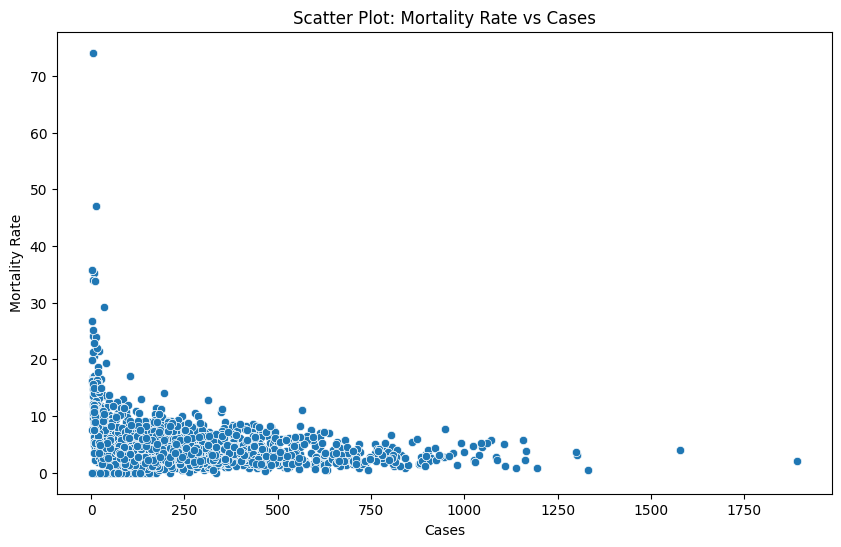

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Mortality Rate' and 'Cases' columns to numeric if needed
merged_data_cleaned['Mortality Rate'] = pd.to_numeric(merged_data_cleaned['Mortality Rate'], errors='coerce')
merged_data_cleaned['Cases'] = pd.to_numeric(merged_data_cleaned['Cases'], errors='coerce')

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cases', y='Mortality Rate', data=merged_data_cleaned)
plt.title('Scatter Plot: Mortality Rate vs Cases')
plt.xlabel('Cases')
plt.ylabel('Mortality Rate')
plt.show()

The scatter plot shows the relationship between the mortality rate and the number of cases. Each point on the plot represents a single data point, with the x-axis showing the number of cases and the y-axis showing the mortality rate.

The data points appear to be clustered around the lower left corner of the plot, suggesting that there is a negative correlation between the number of cases and the mortality rate. This means that as the number of cases increases, the mortality rate decreases.

However, it is important to note that there are also a few data points that are scattered further away from the main cluster. These outliers could be due to a variety of factors, such as errors in the data or the presence of confounding variables.

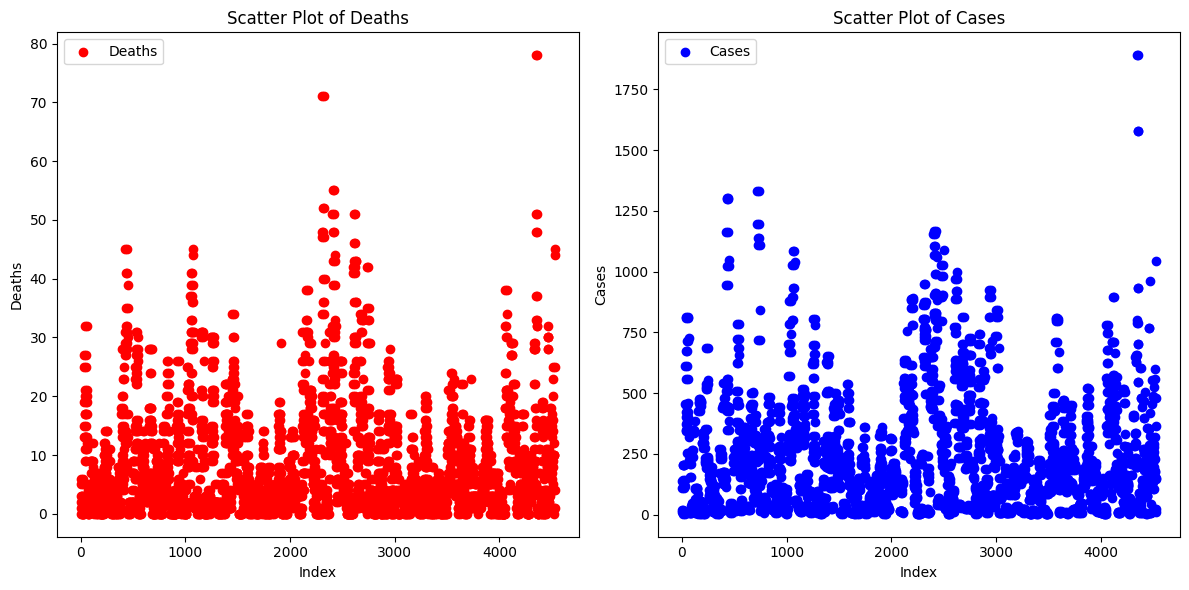

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Scatter plot for 'Deaths'
plt.subplot(1, 2, 1)
plt.scatter(merged_data_cleaned.index, merged_data_cleaned[' Deaths'], color='red', label='Deaths')
plt.title('Scatter Plot of Deaths')
plt.xlabel('Index')
plt.ylabel('Deaths')
plt.legend()

# Scatter plot for 'Cases'
plt.subplot(1, 2, 2)
plt.scatter(merged_data_cleaned.index, merged_data_cleaned['Cases'], color='blue', label='Cases')
plt.title('Scatter Plot of Cases')
plt.xlabel('Index')
plt.ylabel('Cases')
plt.legend()

plt.tight_layout()
plt.show()


The first plot, which is a scatter plot of deaths, shows the number of deaths over time. There appears to be a general upward trend in the number of deaths, although there are also some fluctuations. The second plot, which is a scatter plot of cases, shows the number of cases over time. There also appears to be a general upward trend in the number of cases, although the fluctuations are more pronounced than in the first plot.

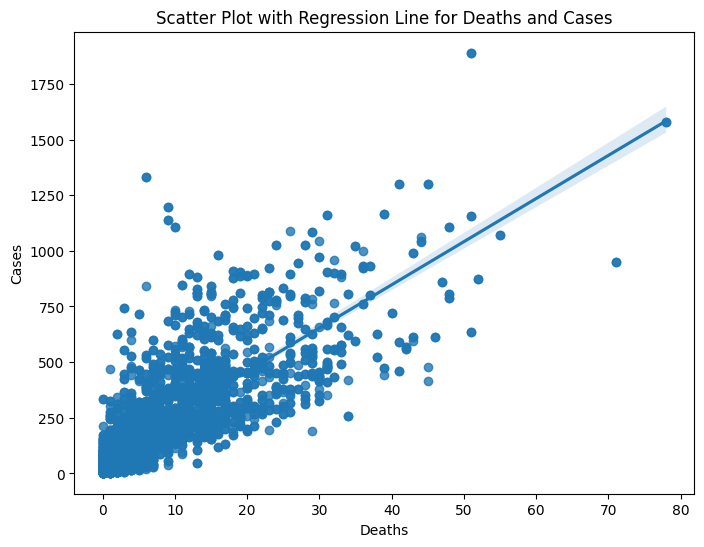

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Scatter plot with regression line for ' Deaths' and 'Cases'
sns.regplot(x=' Deaths', y='Cases', data=merged_data_cleaned)
plt.title('Scatter Plot with Regression Line for Deaths and Cases')
plt.xlabel('Deaths')
plt.ylabel('Cases')

plt.show()

The scatter plot shows the relationship between the number of deaths and the number of cases. Each point on the plot represents a single data point, with the x-axis showing the number of deaths and the y-axis showing the number of cases.

There seems to be a weak positive correlation between deaths and cases. This means that as the number of deaths increases, the number of cases also tends to increase, but the relationship is not very strong. There are many data points that deviate from the trend line, suggesting that there are other factors at play that are influencing the relationship between deaths and cases.

The regression line, which is the blue line in the plot, shows the predicted number of cases for a given number of deaths.

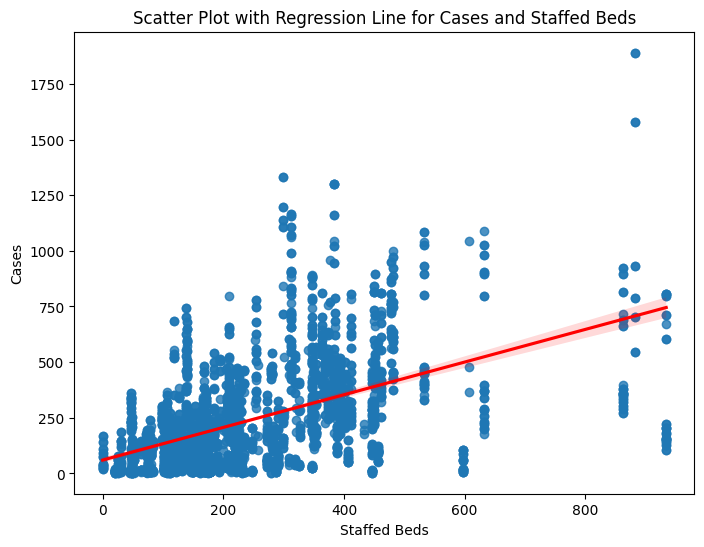

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Scatter plot with regression line for 'Cases' and 'Staffed Beds'
sns.regplot(x='Staffed Beds', y='Cases', data=merged_data_cleaned, line_kws={"color": "red"})
plt.title('Scatter Plot with Regression Line for Cases and Staffed Beds')
plt.xlabel('Staffed Beds')
plt.ylabel('Cases')

plt.show()

The x-axis labeled "Staffed Beds," while the y-axis is labeled "Cases." This suggests the plot is showing the relationship between the number of staffed beds in a medical facility and the number of cases of a disease or condition.
The data points are scattered across the plot, with a general trend of going upwards and to the right. This indicates that as the number of staffed beds increases, the number of cases also tends to increase.
Regression line: The red line running through the data points is the regression line. This line represents the predicted number of cases for a given number of staffed beds, based on the statistical relationship between the two variables. While the data points do show a positive trend, the spread of the points around the regression line suggests the correlation between staffed beds and cases might be weak. This means that while there is a tendency for cases to increase with more staffed beds, the relationship is not very strong, and there could be other factors influencing the number of cases.

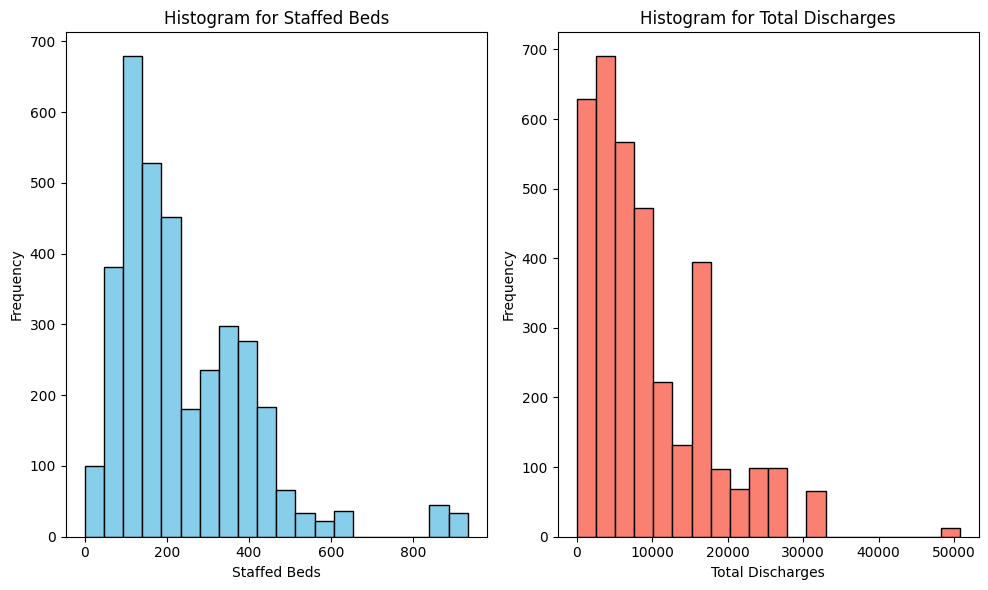

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Histogram for 'Staffed Beds'
plt.subplot(1, 2, 1)
plt.hist(merged_data_cleaned['Staffed Beds'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for Staffed Beds')
plt.xlabel('Staffed Beds')
plt.ylabel('Frequency')

# Histogram for 'Total Discharges'
plt.subplot(1, 2, 2)
plt.hist(merged_data_cleaned['Total Discharges'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram for Total Discharges')
plt.xlabel('Total Discharges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms are both right screwed with blue color graph represting staffed beds to frequency with highest showing between 600 to 700. The salmon color is fir total discharges with highest peak showing between same as staffed beds which is 600 to 700.

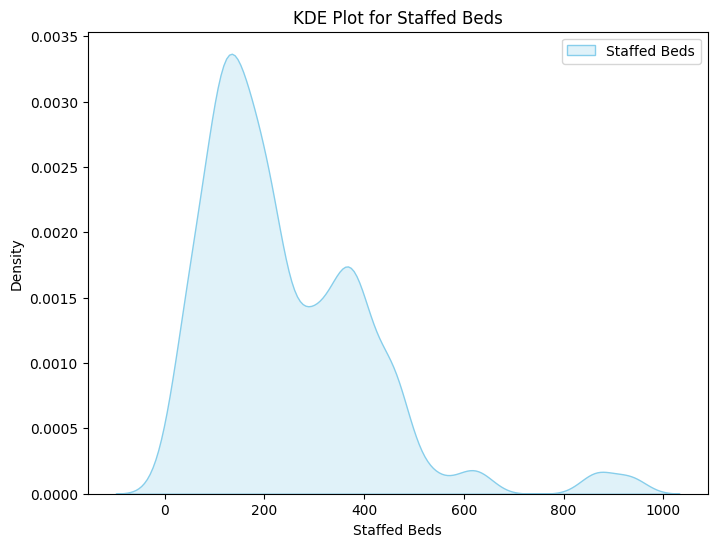

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# KDE plot for 'Staffed Beds'
sns.kdeplot(merged_data_cleaned['Staffed Beds'], fill=True, color='skyblue', label='Staffed Beds')
plt.title('KDE Plot for Staffed Beds')
plt.xlabel('Staffed Beds')
plt.ylabel('Density')
plt.legend()

plt.show()

The KDE plot has satffed beds at x axis and frequency at Y axis, plot for staffed beds show clear peak at 200 mark at staffed beds and drop at 200 to 400 range with samll high at 400 with rapid fall from there onwards with slight high at 600 and in betweein 800 to 1000.

<ipython-input-100-08ed6e204889>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data_cleaned.corr()


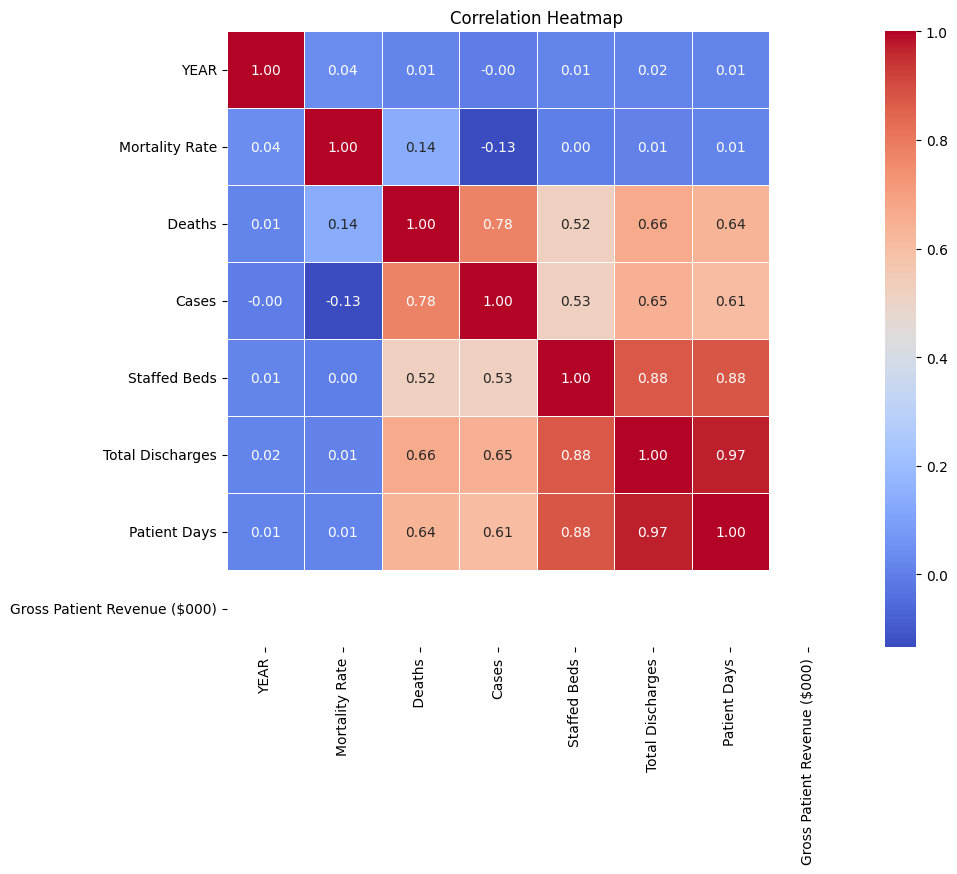

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = merged_data_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap has two axes, each labeled with the same variablebles.

The heatmap cells are colored based on the correlation coefficient between the two variables represented by the row and column headers.
Blue color indicates a negative correlation, meaning that as the value of one variable increases, the value of the other variable tends to decrease.
Red color indicates a positive correlation, meaning that as the value of one variable increases, the value of the other variable tends to increase as well.
White color indicates no correlation, meaning that there is no relationship between the two variables.
The intensity of the color corresponds to the strength of the correlation, with darker colors indicating stronger correlations.
Observations:

The strongest negative correlation appears to be between Mortality Rate and Cases. This suggests that as the number of cases increases, the mortality rate (deaths per case) tends to decrease.
There is also a negative correlation between Mortality Rate and Patient Days. This suggests that as patients stay in the hospital longer, the mortality rate tends to decrease.
There is a positive correlation between Deaths and Cases. This is expected, as a higher number of cases would likely lead to a higher number of deaths.
There is a positive correlation between Cases and Staffed Beds. This suggests that hospitals with more staffed beds tend to see more cases.
There is a positive correlation between Cases and Total Discharges. This suggests that hospitals with more cases also tend to have more discharges.
There is a positive correlation between Total Discharges and Patient Days. This suggests that hospitals with more discharges tend to have patients staying longer on average.
The correlation between Gross Patient Revenue and the other variables is generally weak or non-existent. This suggests that the other variables in the heatmap are not strongly related to the financial performance of the hospitals.

6. ***Conclusion***:
The analysis suggests intricate relationships within the dataset. While higher case numbers are associated with lower mortality rates, the complexity of these relationships is evident in outliers and variable interactions. Staffed beds, total discharges, and patient days show positive correlations with case numbers. Understanding these patterns can inform healthcare resource planning, patient flow management, and potentially contribute to improved patient outcomes. However, caution is advised, as the analysis does not imply causation, and external factors may contribute to observed trends. Further investigation into outliers and additional contextual factors would enhance the interpretation of the findings.